In [1]:
import pandas as pd

In [11]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

# KB부동산 -> 서울 아파트 매매가격 지수 읽기 ('KB주택매매가격지수' 컬럼)

In [2]:

dfSellIdx = pd.read_csv('../URBAILAB/Data.csv')
dfSellIdx

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수(총지수),소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션
0,2015,6,0.229,57.244,71.024,81.4,76.7,83.6,98.2,1.5,...,91.3,97.7,94.909,95.850,92.304,100.092,100.82,101.51,102.08,2.5
1,2015,7,0.242,57.512,71.576,82.5,77.1,84.2,98.2,1.5,...,95.4,97.3,95.080,96.013,92.591,100.102,100.45,102.06,101.64,2.5
2,2015,8,0.223,57.829,72.110,83.2,77.6,84.8,98.2,1.5,...,97.0,97.0,95.213,96.176,92.886,100.102,99.83,102.69,101.22,2.5
3,2015,9,0.220,58.252,72.807,83.9,78.1,85.7,98.4,1.5,...,96.7,96.6,94.966,96.311,93.117,100.122,99.39,101.88,100.60,2.4
4,2015,10,0.241,58.540,73.234,84.4,78.6,86.5,98.5,1.5,...,97.1,96.2,94.966,96.445,93.349,100.142,98.71,97.99,97.49,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,92.1,93.2,113.260,103.660,104.480,102.650,121.56,120.34,140.90,4.1
101,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,91.5,93.1,112.670,103.740,104.550,102.730,121.02,116.16,134.75,4.1
102,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,91.4,93.0,112.710,103.740,104.470,102.810,121.19,114.95,132.52,3.9
103,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,91.5,92.9,113.150,103.740,104.420,102.870,121.83,118.51,135.87,3.8


# KB부동산 -> 서울 매수우위지수 읽기

In [3]:
# KB부동산 -> 서울 매수우위지수 읽기
dfSellSuperiorityIdx = pd.read_csv('data/매수우위지수.csv')
dfSellSuperiorityIdx


,Unnamed: 0,기준년도,기준월,지역,KB매수우위지수
0,0,2018,1,서울,118.0
1,1,2018,2,서울,122.8
2,2,2018,3,서울,103.9
3,3,2018,4,서울,79.0
4,4,2018,5,서울,80.0
...,...,...,...,...,...
71,71,2023,12,서울,20.7
72,72,2024,1,서울,26.3
73,73,2024,2,서울,25.6
74,74,2024,3,서울,29.7


In [8]:
dfMerged = pd.merge(left = dfSellIdx, right = dfSellSuperiorityIdx, on = ['기준년도', '기준월'], how = 'inner')
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,Unnamed: 0,지역,KB매수우위지수
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,99.725,99.051,100.482,102.52,101.04,103.37,2.5,0,서울,118.0
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,99.792,99.171,100.472,102.95,102.27,103.84,2.5,1,서울,122.8
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,99.821,99.282,100.422,102.91,100.82,104.39,2.5,2,서울,103.9
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,99.859,99.402,100.382,103.04,101.00,105.53,2.5,3,서울,79.0
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,99.898,99.486,100.352,103.34,102.75,108.64,2.5,4,서울,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,103.660,104.480,102.650,121.56,120.34,140.90,4.1,69,서울,36.9
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,103.740,104.550,102.730,121.02,116.16,134.75,4.1,70,서울,26.1
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,103.740,104.470,102.810,121.19,114.95,132.52,3.9,71,서울,20.7
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,103.740,104.420,102.870,121.83,118.51,135.87,3.8,72,서울,26.3


In [9]:
# 연도-월 컬럼 추가
ymList = list(map(lambda x: '%d-%02d' % (int(dfMerged['기준년도'][x]), int(dfMerged['기준월'][x])), range(len(dfMerged))))
dfMerged['ym'] = pd.DataFrame(ymList)
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,Unnamed: 0,지역,KB매수우위지수,ym
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,99.051,100.482,102.52,101.04,103.37,2.5,0,서울,118.0,2018-01
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,99.171,100.472,102.95,102.27,103.84,2.5,1,서울,122.8,2018-02
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,99.282,100.422,102.91,100.82,104.39,2.5,2,서울,103.9,2018-03
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,99.402,100.382,103.04,101.00,105.53,2.5,3,서울,79.0,2018-04
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,99.486,100.352,103.34,102.75,108.64,2.5,4,서울,80.0,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,104.480,102.650,121.56,120.34,140.90,4.1,69,서울,36.9,2023-10
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,104.550,102.730,121.02,116.16,134.75,4.1,70,서울,26.1,2023-11
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,104.470,102.810,121.19,114.95,132.52,3.9,71,서울,20.7,2023-12
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,104.420,102.870,121.83,118.51,135.87,3.8,72,서울,26.3,2024-01


# 그래프 그리기

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


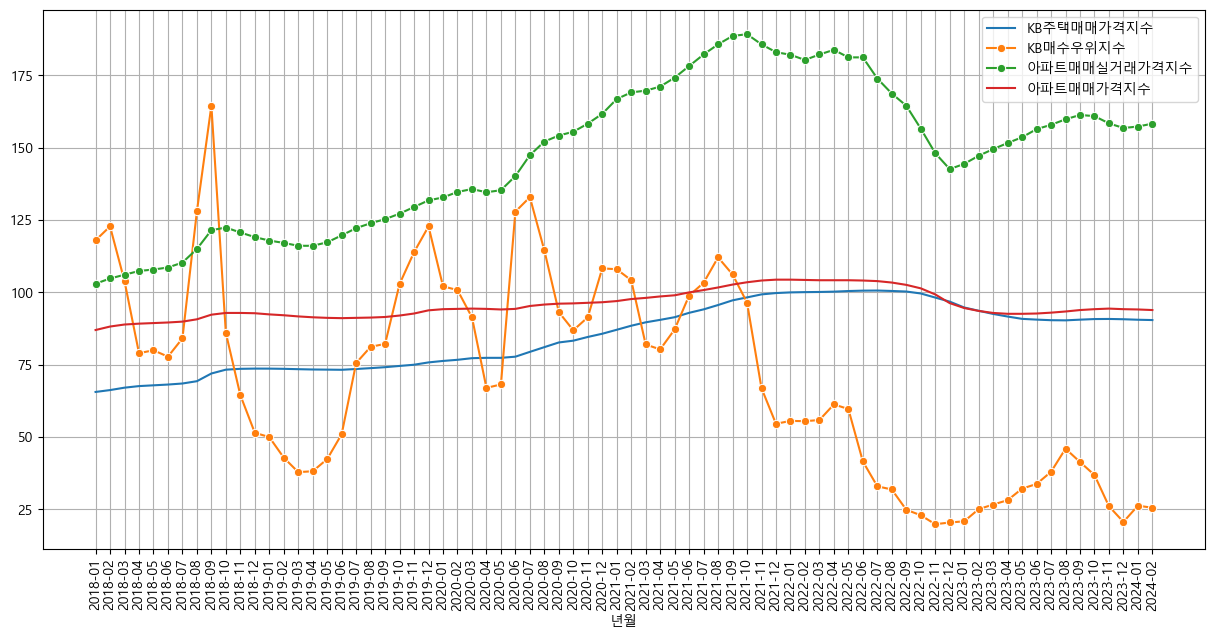

In [21]:
plt.figure(figsize=(15, 7))
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB주택매매가격지수', label = 'KB주택매매가격지수')
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB매수우위지수', label = 'KB매수우위지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '아파트매매실거래가격지수', label = '아파트매매실거래가격지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '아파트매매가격지수', label = '아파트매매가격지수')
plt.xlabel('년월')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

## KB매수우위지수

본 통계는 표본 공인중개사무소를 대상으로 표본 설문조사로 집계된 통계입니다.

조사항목은 매수자많음, 비슷함, 매도자많음 3개중 택1 입니다.

매수우위지수 = 100 + "매수자 많음" 비중 - "매도자 많음" 비중

매수우위지수가 100을 초과할수록 매수자가 많음을, 100 미만일수록 매도자가 많음을 의미합니다.